In [ ]:
# setting up the connection between kaggle and colab

In [ ]:
pip install kaggle 

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle

In [ ]:
! kaggle datasets download -d prasunroy/natural-images

In [ ]:
! unzip natural-images.zip

In [ ]:
# import libs

In [29]:
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers
from keras import optimizers, metrics, models
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

In [ ]:
# setting up the data and spliting it for test and training

In [ ]:
data_dir ='./natural_images'
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="training",
                                                              seed=123,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size
                                                            )

In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=123,
                                                            image_size=(img_height, img_width),
                                                            batch_size=batch_size
                                                          )

Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [ ]:
# validating our data is corrextly retrived 
class_names = train_ds.class_names
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [ ]:
# first lets train our model using adam for optimization, 10 epochs and relu for activation 
model = Sequential([
  layers.Dense(10, activation='relu'),
  layers.Flatten(),
  layers.Dense(len(class_names))
])

model.compile( optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
173/173 [==============================] - 11s 46ms/step - loss: 1711.6512 - accuracy: 0.5897 - val_loss: 824.5009 - val_accuracy: 0.6657
Epoch 2/10
173/173 [==============================] - 8s 44ms/step - loss: 492.4800 - accuracy: 0.7437 - val_loss: 649.7548 - val_accuracy: 0.7034
Epoch 3/10
173/173 [==============================] - 8s 43ms/step - loss: 402.0859 - accuracy: 0.7817 - val_loss: 477.5574 - val_accuracy: 0.7563
Epoch 4/10
173/173 [==============================] - 8s 44ms/step - loss: 240.8939 - accuracy: 0.8264 - val_loss: 341.1670 - val_accuracy: 0.7737
Epoch 5/10
173/173 [==============================] - 8s 44ms/step - loss: 221.0638 - accuracy: 0.8399 - val_loss: 489.4765 - val_accuracy: 0.7324
Epoch 6/10
173/173 [==============================] - 8s 43ms/step - loss: 148.7205 - accuracy: 0.8598 - val_loss: 251.5982 - val_accuracy: 0.8122
Epoch 7/10
173/173 [==============================] - 8s 43ms/step - loss: 110.7754 - accuracy: 0.8801 - val_loss: 3

In [14]:
# lets see our model acurracy based on what we created above
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

test_acc

44/44 - 1s - loss: 193.5643 - accuracy: 0.8187 - 1s/epoch - 32ms/step


0.8187091946601868

Based on this we can see that there is **Overfitting**. We see that there is low accuracy on the testing dataset compare to the training dataset.

---



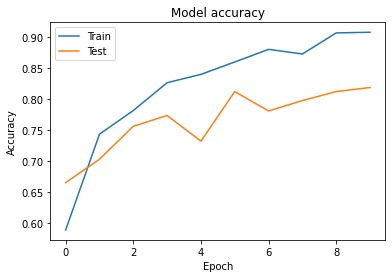

In [19]:
#lets see the graphical representation of the overfitting problem 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

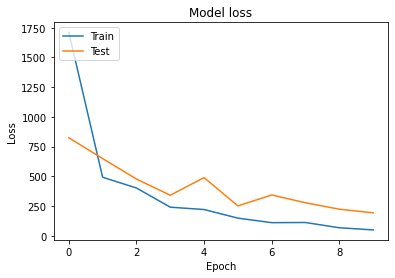

In [20]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

To prevent the overfitting, lets add weight regularization and dropout to our model

In [25]:
# improved model to prevent overfitting
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(len(class_names),kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
173/173 [==============================] - 9s 47ms/step - loss: 4.9443 - accuracy: 0.3703 - val_loss: 1.2134 - val_accuracy: 0.7005
Epoch 2/10
173/173 [==============================] - 8s 46ms/step - loss: 1.7927 - accuracy: 0.4774 - val_loss: 0.8788 - val_accuracy: 0.7752
Epoch 3/10
173/173 [==============================] - 8s 46ms/step - loss: 1.4444 - accuracy: 0.5112 - val_loss: 0.8545 - val_accuracy: 0.8057
Epoch 4/10
173/173 [==============================] - 8s 46ms/step - loss: 1.3811 - accuracy: 0.5139 - val_loss: 0.8914 - val_accuracy: 0.7999
Epoch 5/10
173/173 [==============================] - 8s 45ms/step - loss: 1.3777 - accuracy: 0.5277 - val_loss: 0.8434 - val_accuracy: 0.8151
Epoch 6/10
173/173 [==============================] - 8s 46ms/step - loss: 1.3552 - accuracy: 0.5295 - val_loss: 0.8676 - val_accuracy: 0.8013
Epoch 7/10
173/173 [==============================] - 8s 46ms/step - loss: 1.3405 - accuracy: 0.5342 - val_loss: 0.9835 - val_accuracy: 0.7621

In [26]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
test_acc

44/44 - 1s - loss: 0.8792 - accuracy: 0.7926 - 1s/epoch - 33ms/step


0.7926033139228821

Here we are facing underfitting : tesing acc >> training acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


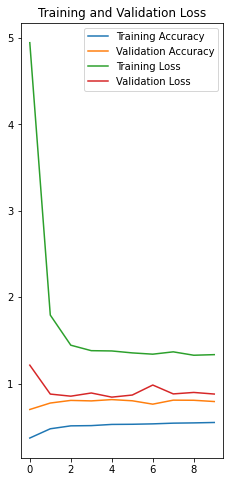

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

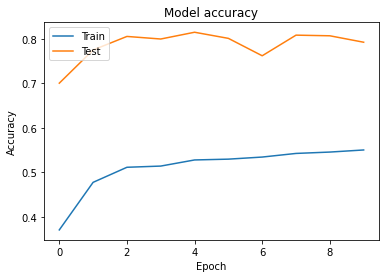

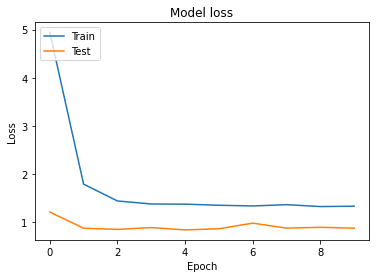

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

To resolve the issues, we will add 6 conv2D layers

To Handle underfitting in CNN
 - add more layers 
 - add more neurons in each layer
 - change the layer used previously 

In [30]:
model = models.Sequential([
    #keras.layers.Flatten(input_shape=IMAGE_SHAPE),
    keras.layers.Conv2D(32, (5, 5), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.22), 
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation=keras.activations.relu),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, kernel_size=(4, 4), activation=keras.activations.relu),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.15),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation=keras.activations.relu),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.15),   
    keras.layers.Dense(256, activation=keras.activations.relu,kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=keras.activations.relu,kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(), 
    keras.layers.Dense(8, activation=keras.activations.softmax)
    ])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


173/173 [==============================] - 18s 60ms/step - loss: 1.4010 - accuracy: 0.5475 - val_loss: 1.7180 - val_accuracy: 0.5562
Epoch 2/50
173/173 [==============================] - 10s 56ms/step - loss: 0.8936 - accuracy: 0.7284 - val_loss: 0.7073 - val_accuracy: 0.7832
Epoch 3/50
173/173 [==============================] - 10s 59ms/step - loss: 0.6526 - accuracy: 0.8107 - val_loss: 0.9230 - val_accuracy: 0.7121
Epoch 4/50
173/173 [==============================] - 10s 56ms/step - loss: 0.4843 - accuracy: 0.8598 - val_loss: 0.4785 - val_accuracy: 0.8484
Epoch 5/50
173/173 [==============================] - 10s 55ms/step - loss: 0.4171 - accuracy: 0.8772 - val_loss: 0.4147 - val_accuracy: 0.8876
Epoch 6/50
173/173 [==============================] - 10s 55ms/step - loss: 0.3587 - accuracy: 0.8973 - val_loss: 0.4022 - val_accuracy: 0.8796
Epoch 7/50
173/173 [==============================] - 11s 61ms/step - loss: 0.3538 - accuracy: 0.9018 - val_loss: 0.4505 - val_accuracy: 0.8629
Epo

In [31]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
test_acc

44/44 - 3s - loss: 0.3373 - accuracy: 0.9144 - 3s/epoch - 63ms/step


0.9144307374954224